In [115]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8')

---

### Этапы CRISP-DM
1. Анализ требований
2. Исследование данных
3. Подготовка данных
4. Моделирование
5. Оценка модели
6. Внедрение

---

### Первичный анализ данных

In [116]:
audi_data = pd.read_csv('./data/audi.csv')

In [117]:
audi_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [118]:
audi_data.shape

(10668, 9)

In [119]:
audi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


---

### Итерация №1
Оцениваем решаема ли задача. Может ли модель получить базовое качество (baseline). Проводим первичный анализ данных и строим приметивную модель без подбора параметров

In [120]:
audi_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [121]:
audi_data.describe(include='object')

,model,transmission,fuelType
count,10668,10668,10668
unique,26,3,3
top,A3,Manual,Diesel
freq,1929,4369,5577


In [122]:
temp_data = audi_data.copy()

---

Выделяем числовые признаки

In [123]:
types = temp_data.dtypes
num_features = list(types[types != 'object'].index)
num_features

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

Построим графики

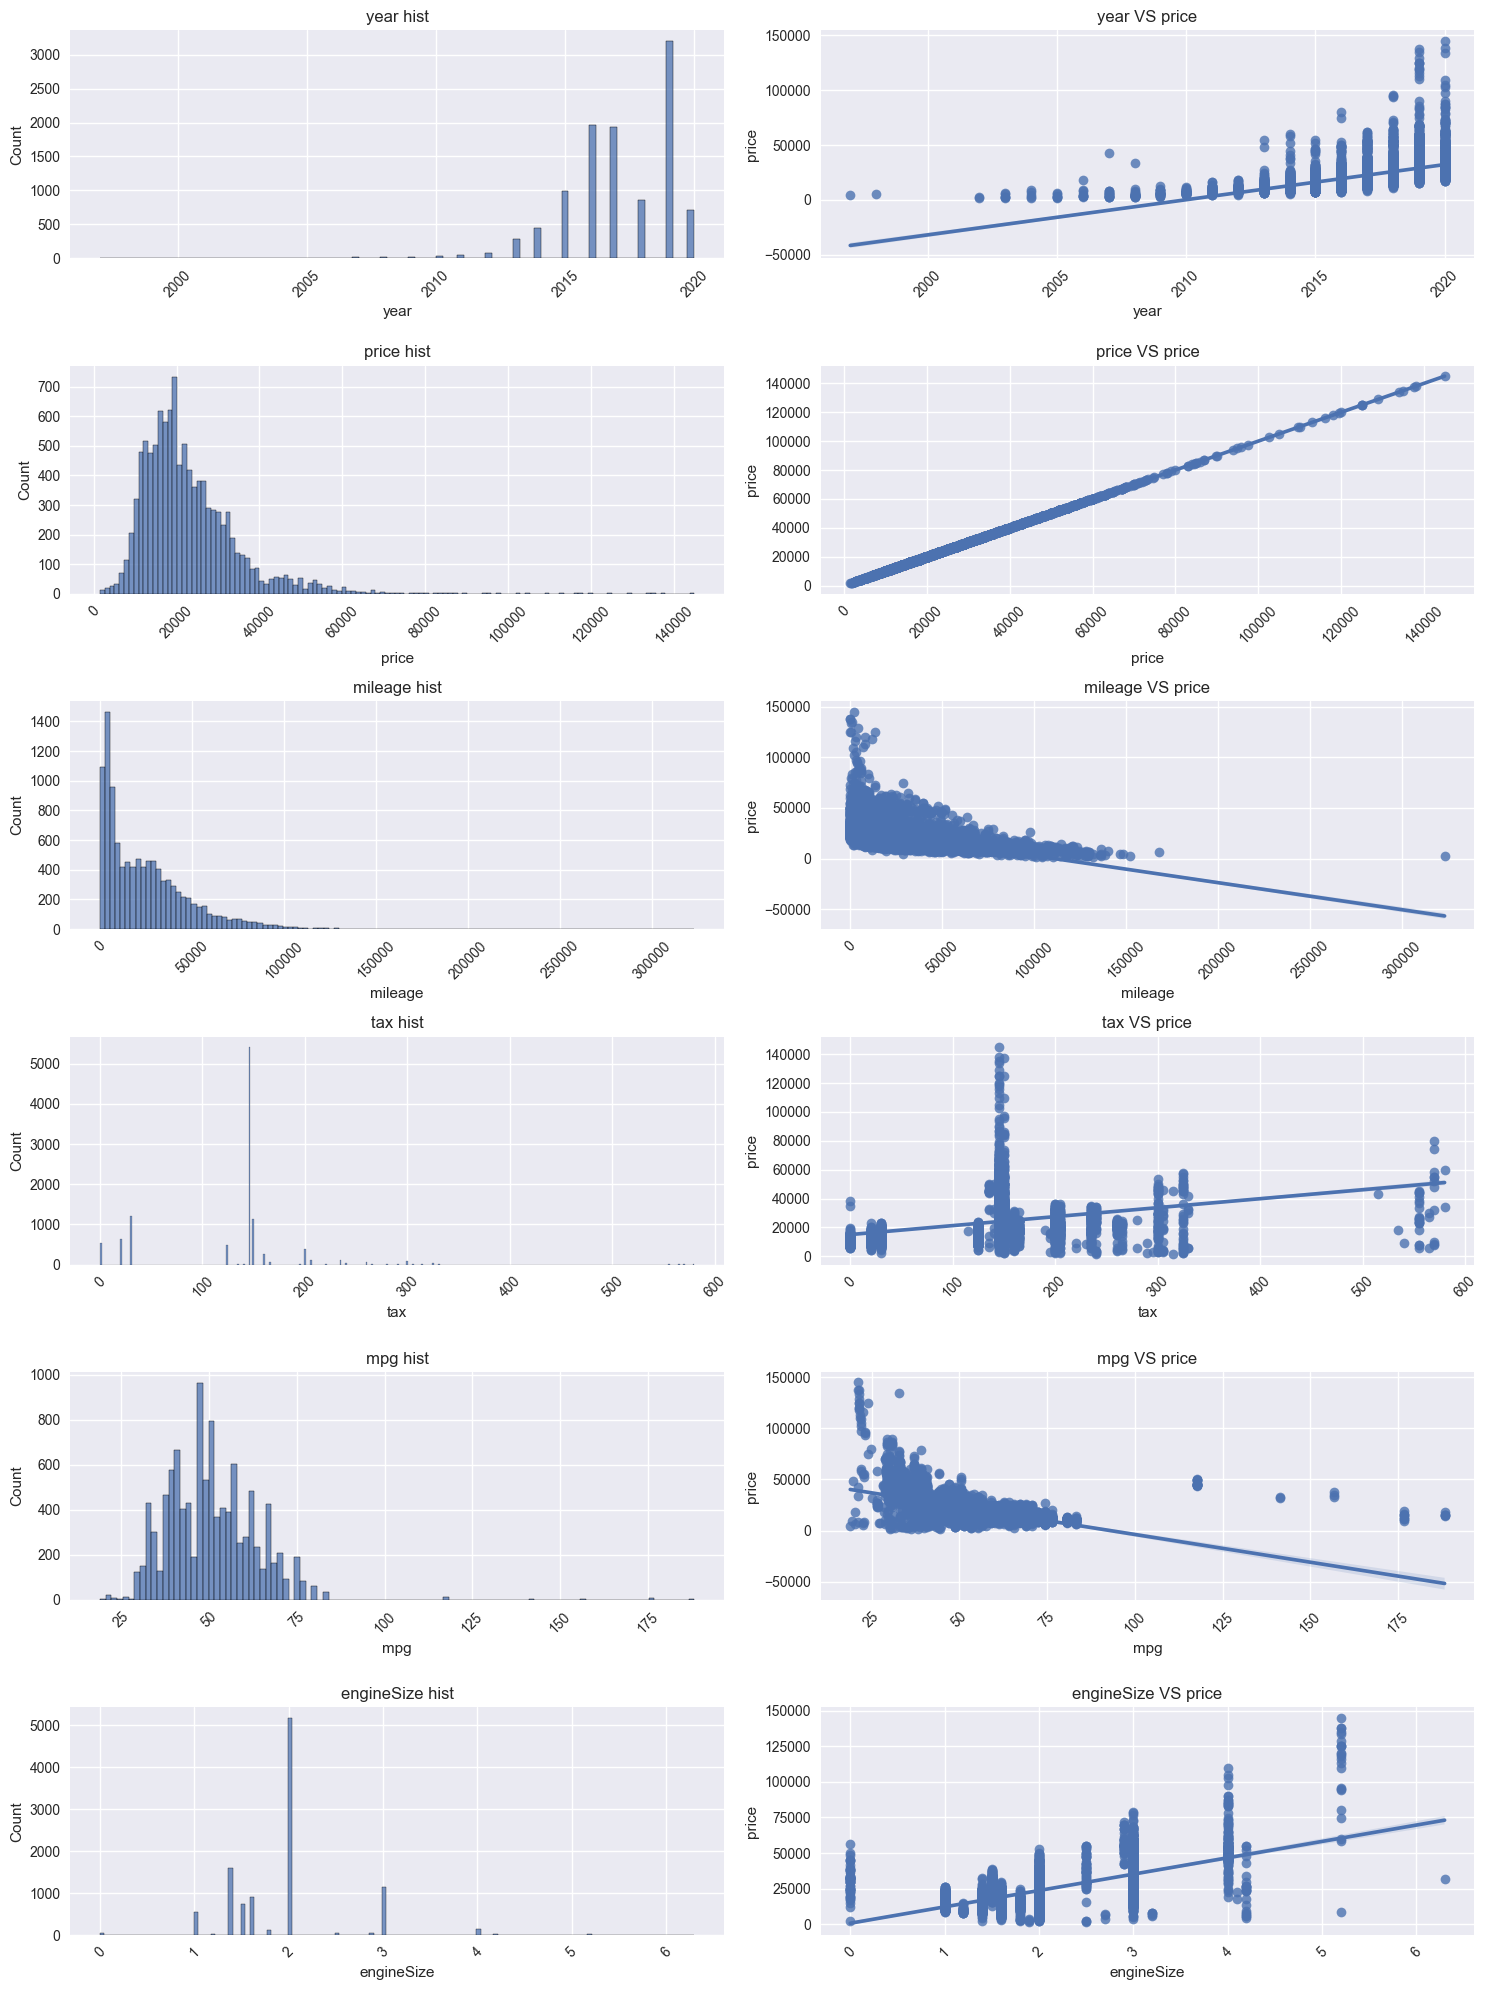

In [124]:
n = len(num_features)
fig, axes = plt.subplots(n, 2, figsize=(15,20))

for i, feature in enumerate(num_features):
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    histplot.set_title(f'{feature} hist')
    histplot.xaxis.set_tick_params(rotation=45)
    
    regplot = sns.regplot(data=temp_data, x=feature, y='price', ax=axes[i][1])
    regplot.set_title(f'{feature} VS price')
    regplot.xaxis.set_tick_params(rotation=45)
    
plt.tight_layout()

/var/folders/1_/hgb3xg852md0hqqs3ybwbsp40000gn/T/ipykernel_37407/2679949597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=temp_data.corr(), annot=True)


<AxesSubplot: >

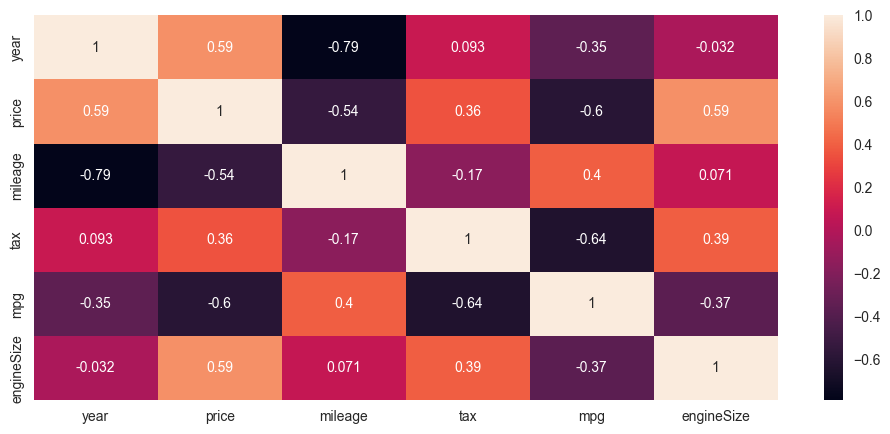

In [125]:
fig = plt.figure(figsize=(12,5))
sns.heatmap(data=temp_data.corr(), annot=True)

---

### Подготовка данных 

In [126]:
dummies_data = pd.get_dummies(temp_data)
dummies_data.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


---

### Отделяем матрицу примеров от матрицы ответов

In [127]:
X = dummies_data.drop('price', axis=1)
y = dummies_data['price']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)
print(f'Train set shape: {X_train.shape}\nTest set shape: {X_test.shape}')

Train set shape: (8534, 37)
Test set shape: (2134, 37)


---

### Моделирование

In [129]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print(f'Train R^2: {round(metrics.r2_score(y_train, y_train_predict),3)}')
    print(f'Train MAE: {round(metrics.mean_absolute_error(y_train, y_train_predict),3)}')
    print(f'Train MAPE: {round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100,2)}')
    
    print('\n')
    
    print(f'Test R^2: {round(metrics.r2_score(y_test, y_test_predict),3)}')
    print(f'Test MAE: {round(metrics.mean_absolute_error(y_test, y_test_predict),3)}')
    print(f'Test MAPE: {round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100,2)}')

### Аналитическое решение

In [130]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.893
Train MAE: 2550.204
Train MAPE: 13.38


Test R^2: 0.887
Test MAE: 2613.726
Test MAPE: 12.88


### Метод градиентного спуска

In [131]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_lr = linear_model.SGDRegressor(random_state=42)
sgd_lr.fit(X_train_scaled, y_train)
y_train_predict = sgd_lr.predict(X_train_scaled)
y_test_predict = sgd_lr.predict(X_test_scaled)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.888
Train MAE: 2566.03
Train MAPE: 13.82


Test R^2: 0.884
Test MAE: 2601.702
Test MAPE: 12.88


---

### Итерация №2

Исследование данных на примере логарифмирования факторов для получения нормального распределения

---

Прологорифмирем цену

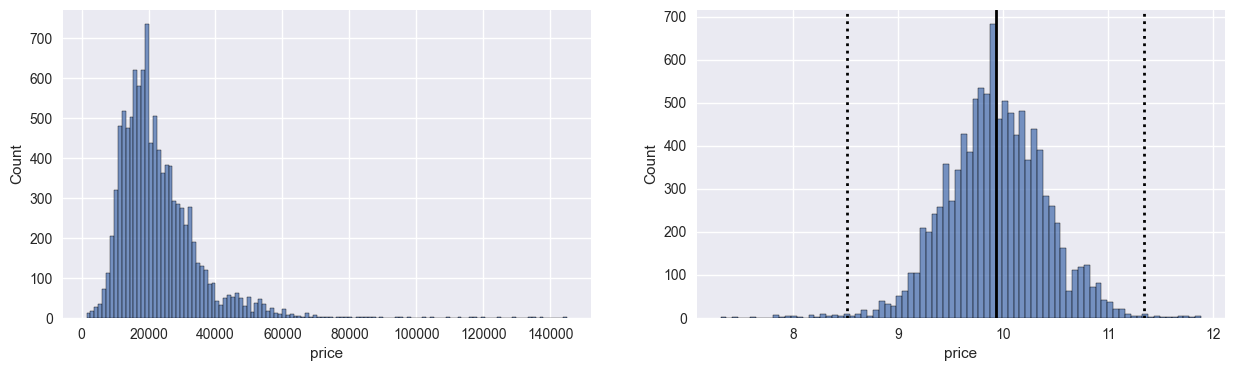

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=temp_data, x='price', ax=axes[0]);

log_price = np.log(temp_data['price'])
sns.histplot(data=log_price, ax=axes[1]);

axes[1].axvline(log_price.mean(), color='k', lw=2)
axes[1].axvline(log_price.mean()+3*log_price.std(), color='k', lw=2, ls=':')
axes[1].axvline(log_price.mean()-3*log_price.std(), color='k', lw=2, ls=':');


---

Пробег

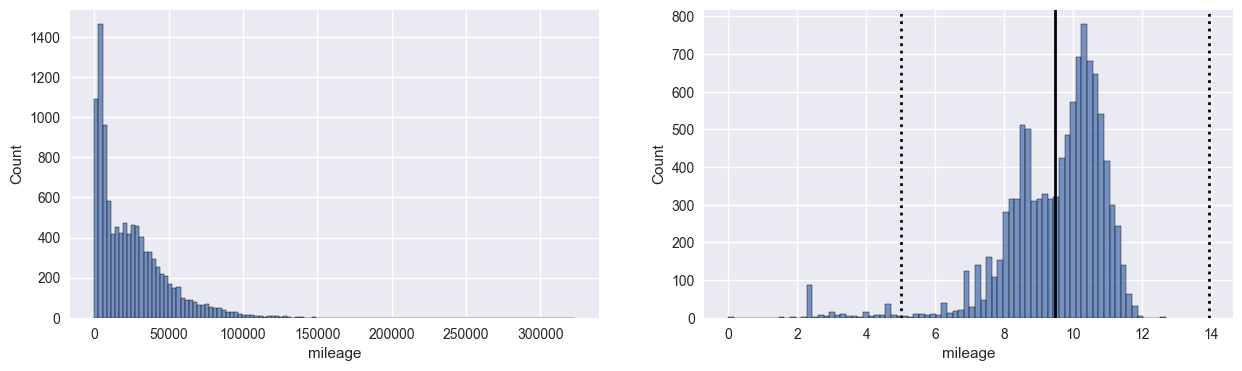

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=temp_data, x='mileage', ax=axes[0]);

log_price = np.log(temp_data['mileage'])
sns.histplot(data=log_price, ax=axes[1]);

axes[1].axvline(log_price.mean(), color='k', lw=2)
axes[1].axvline(log_price.mean()+3*log_price.std(), color='k', lw=2, ls=':')
axes[1].axvline(log_price.mean()-3*log_price.std(), color='k', lw=2, ls=':');

---

Расход топлива

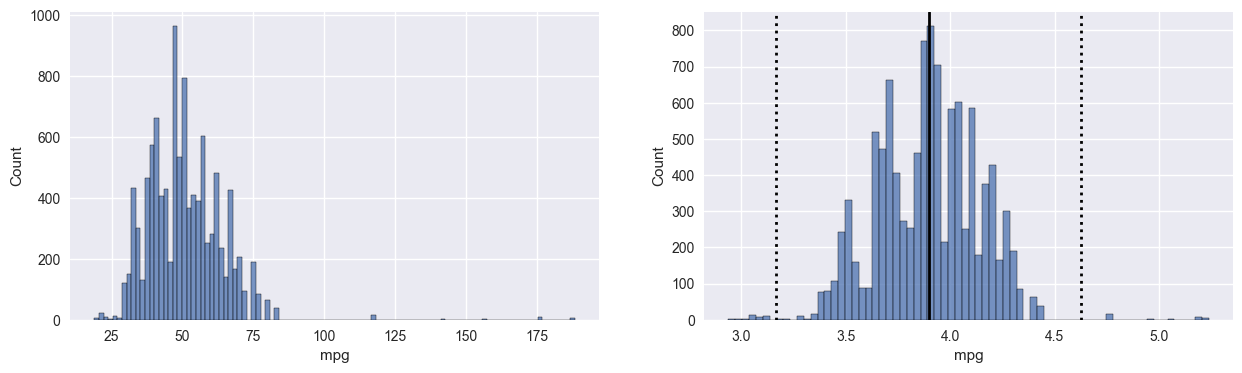

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=temp_data, x='mpg', ax=axes[0]);

log_price = np.log(temp_data['mpg'])
sns.histplot(data=log_price, ax=axes[1]);

axes[1].axvline(log_price.mean(), color='k', lw=2)
axes[1].axvline(log_price.mean()+3*log_price.std(), color='k', lw=2, ls=':')
axes[1].axvline(log_price.mean()-3*log_price.std(), color='k', lw=2, ls=':');

---

In [135]:
# Finding outliers by z-method with adjustment option for boundaries.

def outliers_z_score(data, feature, left_mod=3, right_mod=3, log_scale=False):
    """Function for finding outliers by z-method with adjustment option for left and right multiplier.

    Args:
        data (DataFrame): DataFrame which will be used to find outliers.
        feature (string): Name of a column in DF which will be inspected for outliers.
        left_mod (int, optional): lower boundary multiplier. Defaults to 3.
        right_mod (int, optional): upper boundary multiplier. Defaults to 3.
        log_scale (bool, optional): converting data in logarithmic representation in case of lognormal destribution of
        original data. Defaults to False.

    Returns:
        DataFrame: returns two copies of the original DataFrame contain DF's with outliers and cleaned data.
    """    ''''''

    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]

    mu = x.mean()

    sigma = x.std()

    lower_bound = mu - left_mod * sigma

    upper_bound = mu + right_mod * sigma

    outliers = data[(x < lower_bound) | (x > upper_bound)]

    cleaned = data[(x > lower_bound) & (x < upper_bound)]

    print(f'Number of outliers by z-method: {outliers.shape[0]}')
    print(f'Resulting number of lines cleared of outliers: {cleaned.shape[0]}')

    return outliers, cleaned


In [136]:
outliers, temp_cleaned = outliers_z_score(data=temp_data, feature='price',log_scale=True)
outliers, temp_cleaned = outliers_z_score(data=temp_cleaned, feature='mileage',log_scale=True)
outliers, temp_cleaned = outliers_z_score(data=temp_cleaned, feature='mpg',log_scale=True)

Number of outliers by z-method: 86
Resulting number of lines cleared of outliers: 10582
Number of outliers by z-method: 226
Resulting number of lines cleared of outliers: 10356
Number of outliers by z-method: 48
Resulting number of lines cleared of outliers: 10308


In [137]:
dummies_data = pd.get_dummies(temp_cleaned)
dummies_data.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A3,model_ A4,model_ A5,...,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,2019,17300,1998,145,49.6,1.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [138]:
X = dummies_data.drop('price',axis=1)
y = dummies_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Моделирование

In [139]:
y_train_log = np.log(y_train)

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train_log)

y_train_pred = np.exp(lr.predict(X_train))
y_test_pred = np.exp(lr.predict(X_test))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.927
Train MAE: 1981.405
Train MAPE: 8.79


Test R^2: 0.918
Test MAE: 1992.772
Test MAPE: 8.88


---

### Моделирование через полином

In [140]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

### Регуляризируем модель для исключения проблемы переобучения

In [141]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)

y_train_pred = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.946
Train MAE: 1731.443
Train MAPE: 7.85


Test R^2: 0.937
Test MAE: 1782.189
Test MAPE: 8.09


### Подберем параметр регуляризации alpha

In [142]:
#Создаём список из 20 возможных значений от 0.001 до 1 L2-регуляризация
alpha_list = np.linspace(0.01, 10, 20)
#Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []

for alpha in alpha_list:
    #Создаём объект класса линейной регрессии с L1-регуляризацией
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    #Обучаем модель
    ridge_lr_poly.fit(X_train_scaled_poly, y_train)
    #Делаем предсказание для тренировочной выборки
    y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
    #Делаем предсказание для тестовой выборки
    y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
    #Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

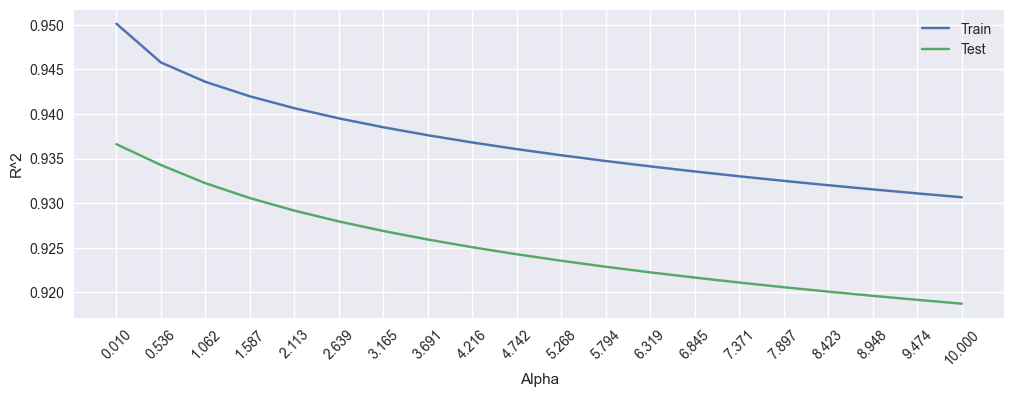

In [143]:
# Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4))  # фигура + координатная плоскость
# линейный график для тренировочной выборки
ax.plot(alpha_list, train_scores, label='Train')
# линейный график для тестовой выборки
ax.plot(alpha_list, test_scores, label='Test')
ax.set_xlabel('Alpha')  # название оси абсцисс
ax.set_ylabel('R^2')  # название оси ординат
ax.set_xticks(alpha_list)  # метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45)  # поворот меток на оси абсцисс
ax.legend()  # отображение легенды

### Используем этот параметр в нашей модели

In [144]:
ridge_lr_poly = linear_model.Ridge(alpha=0.01)
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)

y_train_pred = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.952
Train MAE: 1656.066
Train MAPE: 7.61


Test R^2: 0.94
Test MAE: 1733.949
Test MAPE: 7.92


Text(23.999999999999986, 0.5, 'Model')

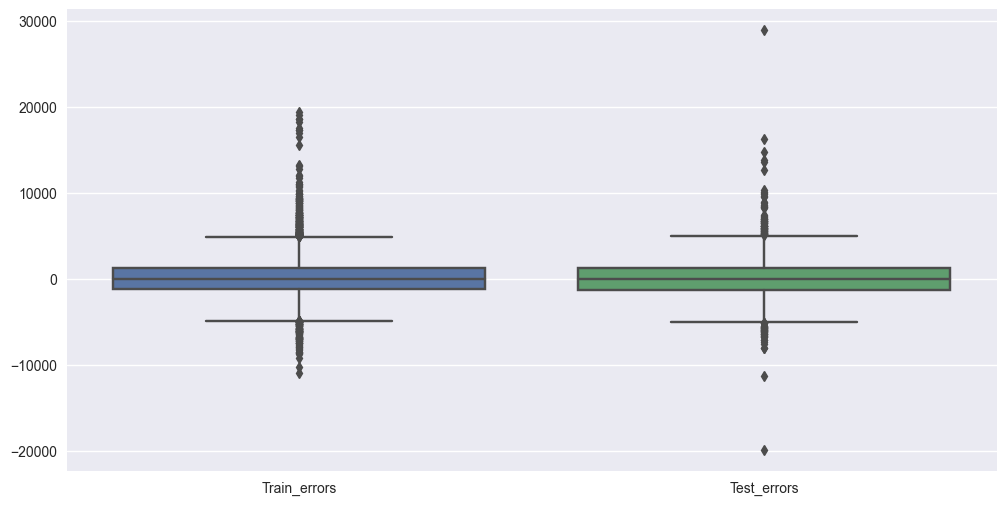

In [146]:
# Визуализируем ошибки
fig, axes = plt.subplots(figsize=(12,6))
# Ошибки модели на тренировочной выборке
y_train_errors = y_train - y_train_pred
# Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
# Создаем df из ошибок
predict_df = pd.DataFrame({
    'Train_errors': y_train_errors,
    'Test_errors': y_test_errors
})
# Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax= axes)
ax.set_xlabel('Model errors')
ax.set_ylabel('Model')
